In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12, 8)

pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('./data/train.csv')

print(df.shape)
print()
print(df.dtypes)
print()
print(df.info())

df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
print(numeric_cols)

df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values
print(non_numeric_cols)

(30471, 292)

id                      int64
timestamp              object
full_sq                 int64
life_sq               float64
floor                 float64
                       ...   
mosque_count_5000       int64
leisure_count_5000      int64
sport_count_5000        int64
market_count_5000       int64
price_doc               int64
Length: 292, dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30471 entries, 0 to 30470
Columns: 292 entries, id to price_doc
dtypes: float64(119), int64(157), object(16)
memory usage: 67.9+ MB
None
['id' 'full_sq' 'life_sq' 'floor' 'max_floor' 'material' 'build_year'
 'num_room' 'kitch_sq' 'state' 'area_m' 'raion_popul' 'green_zone_part'
 'indust_part' 'children_preschool' 'preschool_quota'
 'preschool_education_centers_raion' 'children_school' 'school_quota'
 'school_education_centers_raion' 'school_education_centers_top_20_raion'
 'hospital_beds_raion' 'healthcare_centers_raion'
 'university_top_20_raion' 'sport_objects_raion'
 '

Попробуем обнаружить отсутствующие данные с помощью тепловой карты

<Axes: >

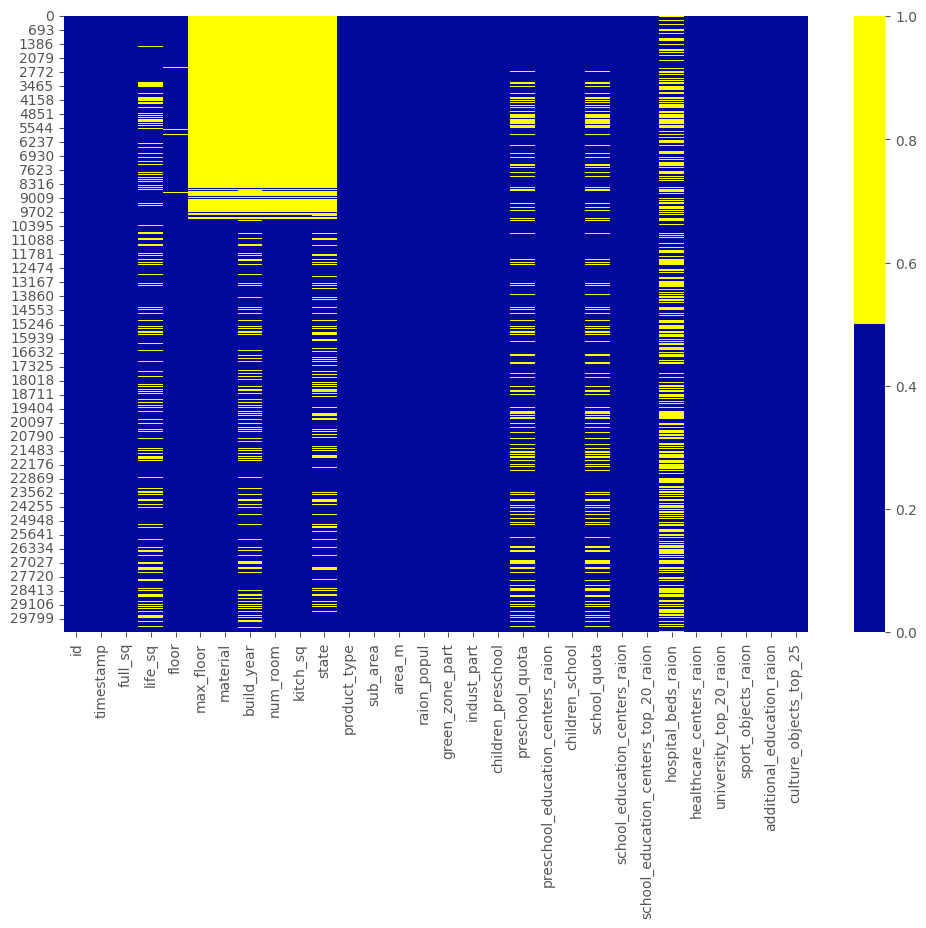

In [3]:
cols = df.columns[:30]
colours = ['#000999', '#ffff00']
sns.heatmap(df[cols].isnull(), cmap=sns.color_palette(colours))

In [4]:
for col in df.columns:
    missing_values = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(missing_values*100)))

id - 0%
timestamp - 0%
full_sq - 0%
life_sq - 21%
floor - 1%
max_floor - 31%
material - 31%
build_year - 45%
num_room - 31%
kitch_sq - 31%
state - 44%
product_type - 0%
sub_area - 0%
area_m - 0%
raion_popul - 0%
green_zone_part - 0%
indust_part - 0%
children_preschool - 0%
preschool_quota - 22%
preschool_education_centers_raion - 0%
children_school - 0%
school_quota - 22%
school_education_centers_raion - 0%
school_education_centers_top_20_raion - 0%
hospital_beds_raion - 47%
healthcare_centers_raion - 0%
university_top_20_raion - 0%
sport_objects_raion - 0%
additional_education_raion - 0%
culture_objects_top_25 - 0%
culture_objects_top_25_raion - 0%
shopping_centers_raion - 0%
office_raion - 0%
thermal_power_plant_raion - 0%
incineration_raion - 0%
oil_chemistry_raion - 0%
radiation_raion - 0%
railroad_terminal_raion - 0%
big_market_raion - 0%
nuclear_reactor_raion - 0%
detention_facility_raion - 0%
full_all - 0%
male_f - 0%
female_f - 0%
young_all - 0%
young_male - 0%
young_female - 0

created missing indicator for: life_sq
created missing indicator for: floor
created missing indicator for: max_floor
created missing indicator for: material
created missing indicator for: build_year
created missing indicator for: num_room
created missing indicator for: kitch_sq
created missing indicator for: state
created missing indicator for: preschool_quota
created missing indicator for: school_quota
created missing indicator for: hospital_beds_raion
created missing indicator for: raion_build_count_with_material_info
created missing indicator for: build_count_block
created missing indicator for: build_count_wood
created missing indicator for: build_count_frame
created missing indicator for: build_count_brick
created missing indicator for: build_count_monolith
created missing indicator for: build_count_panel
created missing indicator for: build_count_foam
created missing indicator for: build_count_slag
created missing indicator for: build_count_mix
created missing indicator for: raio

<Axes: title={'center': 'Histogram of Missing Values'}, xlabel='Number of Missing Values', ylabel='Number of Rows'>

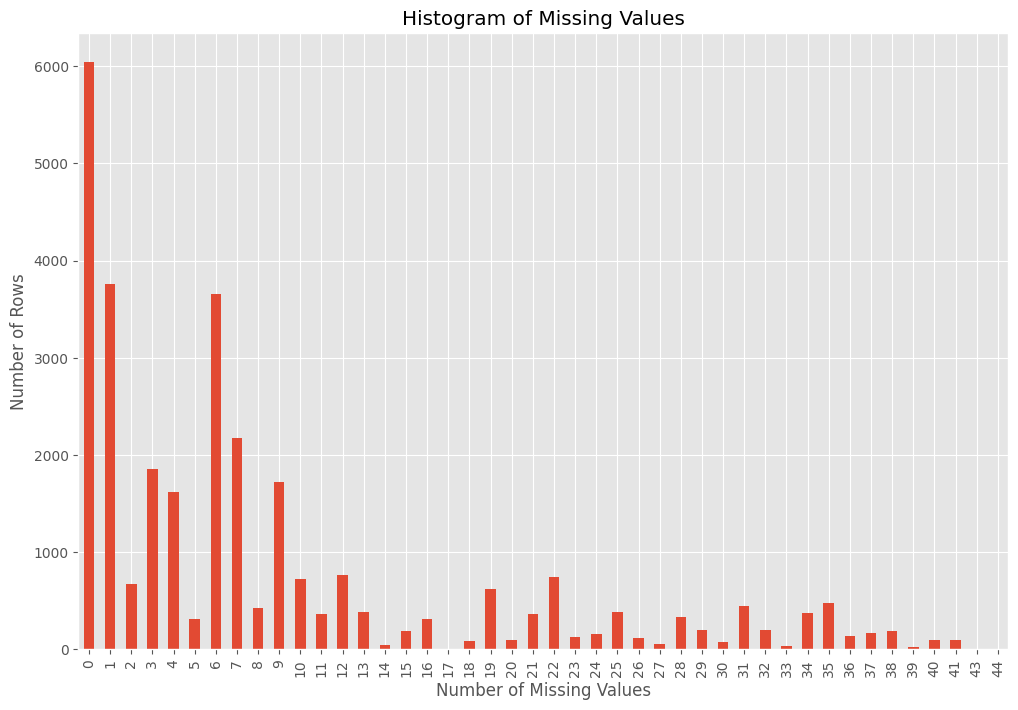

In [5]:
for col in df.columns:
    missing = df[col].isnull()
    num_missing = np.sum(missing)

    if num_missing > 0:
        print('created missing indicator for: {}'.format(col))
        df['{}_ismissing'.format(col)] = missing

ismissing_cols = [col for col in df.columns if 'ismissing' in col]
df['num_missing'] = df[ismissing_cols].sum(axis=1)
# df['num_missing'].value_counts().reset_index().sort_values(by='index').plot.bar(x='index', y='num_missing')
df['num_missing'].value_counts().sort_index().plot.bar(title='Histogram of Missing Values', xlabel='Number of Missing Values', ylabel='Number of Rows')

In [6]:
ind_missing = df[df['num_missing'] > 35]
df_less_missing_rows = df.drop(ind_missing)

KeyError: "['id', 'timestamp', 'full_sq', 'life_sq', 'floor', 'max_floor', 'material', 'build_year', 'num_room', 'kitch_sq', 'state', 'product_type', 'sub_area', 'area_m', 'raion_popul', 'green_zone_part', 'indust_part', 'children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 'hospital_beds_raion', 'healthcare_centers_raion', 'university_top_20_raion', 'sport_objects_raion', 'additional_education_raion', 'culture_objects_top_25', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'office_raion', 'thermal_power_plant_raion', 'incineration_raion', 'oil_chemistry_raion', 'radiation_raion', 'railroad_terminal_raion', 'big_market_raion', 'nuclear_reactor_raion', 'detention_facility_raion', 'full_all', 'male_f', 'female_f', 'young_all', 'young_male', 'young_female', 'work_all', 'work_male', 'work_female', 'ekder_all', 'ekder_male', 'ekder_female', '0_6_all', '0_6_male', '0_6_female', '7_14_all', '7_14_male', '7_14_female', '0_17_all', '0_17_male', '0_17_female', '16_29_all', '16_29_male', '16_29_female', '0_13_all', '0_13_male', '0_13_female', 'raion_build_count_with_material_info', 'build_count_block', 'build_count_wood', 'build_count_frame', 'build_count_brick', 'build_count_monolith', 'build_count_panel', 'build_count_foam', 'build_count_slag', 'build_count_mix', 'raion_build_count_with_builddate_info', 'build_count_before_1920', 'build_count_1921-1945', 'build_count_1946-1970', 'build_count_1971-1995', 'build_count_after_1995', 'ID_metro', 'metro_min_avto', 'metro_km_avto', 'metro_min_walk', 'metro_km_walk', 'kindergarten_km', 'school_km', 'park_km', 'green_zone_km', 'industrial_km', 'water_treatment_km', 'cemetery_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 'ID_railroad_station_walk', 'railroad_station_avto_km', 'railroad_station_avto_min', 'ID_railroad_station_avto', 'public_transport_station_km', 'public_transport_station_min_walk', 'water_km', 'water_1line', 'mkad_km', 'ttk_km', 'sadovoe_km', 'bulvar_ring_km', 'kremlin_km', 'big_road1_km', 'ID_big_road1', 'big_road1_1line', 'big_road2_km', 'ID_big_road2', 'railroad_km', 'railroad_1line', 'zd_vokzaly_avto_km', 'ID_railroad_terminal', 'bus_terminal_avto_km', 'ID_bus_terminal', 'oil_chemistry_km', 'nuclear_reactor_km', 'radiation_km', 'power_transmission_line_km', 'thermal_power_plant_km', 'ts_km', 'big_market_km', 'market_shop_km', 'fitness_km', 'swim_pool_km', 'ice_rink_km', 'stadium_km', 'basketball_km', 'hospice_morgue_km', 'detention_facility_km', 'public_healthcare_km', 'university_km', 'workplaces_km', 'shopping_centers_km', 'office_km', 'additional_education_km', 'preschool_km', 'big_church_km', 'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'ecology', 'green_part_500', 'prom_part_500', 'office_count_500', 'office_sqm_500', 'trc_count_500', 'trc_sqm_500', 'cafe_count_500', 'cafe_sum_500_min_price_avg', 'cafe_sum_500_max_price_avg', 'cafe_avg_price_500', 'cafe_count_500_na_price', 'cafe_count_500_price_500', 'cafe_count_500_price_1000', 'cafe_count_500_price_1500', 'cafe_count_500_price_2500', 'cafe_count_500_price_4000', 'cafe_count_500_price_high', 'big_church_count_500', 'church_count_500', 'mosque_count_500', 'leisure_count_500', 'sport_count_500', 'market_count_500', 'green_part_1000', 'prom_part_1000', 'office_count_1000', 'office_sqm_1000', 'trc_count_1000', 'trc_sqm_1000', 'cafe_count_1000', 'cafe_sum_1000_min_price_avg', 'cafe_sum_1000_max_price_avg', 'cafe_avg_price_1000', 'cafe_count_1000_na_price', 'cafe_count_1000_price_500', 'cafe_count_1000_price_1000', 'cafe_count_1000_price_1500', 'cafe_count_1000_price_2500', 'cafe_count_1000_price_4000', 'cafe_count_1000_price_high', 'big_church_count_1000', 'church_count_1000', 'mosque_count_1000', 'leisure_count_1000', 'sport_count_1000', 'market_count_1000', 'green_part_1500', 'prom_part_1500', 'office_count_1500', 'office_sqm_1500', 'trc_count_1500', 'trc_sqm_1500', 'cafe_count_1500', 'cafe_sum_1500_min_price_avg', 'cafe_sum_1500_max_price_avg', 'cafe_avg_price_1500', 'cafe_count_1500_na_price', 'cafe_count_1500_price_500', 'cafe_count_1500_price_1000', 'cafe_count_1500_price_1500', 'cafe_count_1500_price_2500', 'cafe_count_1500_price_4000', 'cafe_count_1500_price_high', 'big_church_count_1500', 'church_count_1500', 'mosque_count_1500', 'leisure_count_1500', 'sport_count_1500', 'market_count_1500', 'green_part_2000', 'prom_part_2000', 'office_count_2000', 'office_sqm_2000', 'trc_count_2000', 'trc_sqm_2000', 'cafe_count_2000', 'cafe_sum_2000_min_price_avg', 'cafe_sum_2000_max_price_avg', 'cafe_avg_price_2000', 'cafe_count_2000_na_price', 'cafe_count_2000_price_500', 'cafe_count_2000_price_1000', 'cafe_count_2000_price_1500', 'cafe_count_2000_price_2500', 'cafe_count_2000_price_4000', 'cafe_count_2000_price_high', 'big_church_count_2000', 'church_count_2000', 'mosque_count_2000', 'leisure_count_2000', 'sport_count_2000', 'market_count_2000', 'green_part_3000', 'prom_part_3000', 'office_count_3000', 'office_sqm_3000', 'trc_count_3000', 'trc_sqm_3000', 'cafe_count_3000', 'cafe_sum_3000_min_price_avg', 'cafe_sum_3000_max_price_avg', 'cafe_avg_price_3000', 'cafe_count_3000_na_price', 'cafe_count_3000_price_500', 'cafe_count_3000_price_1000', 'cafe_count_3000_price_1500', 'cafe_count_3000_price_2500', 'cafe_count_3000_price_4000', 'cafe_count_3000_price_high', 'big_church_count_3000', 'church_count_3000', 'mosque_count_3000', 'leisure_count_3000', 'sport_count_3000', 'market_count_3000', 'green_part_5000', 'prom_part_5000', 'office_count_5000', 'office_sqm_5000', 'trc_count_5000', 'trc_sqm_5000', 'cafe_count_5000', 'cafe_sum_5000_min_price_avg', 'cafe_sum_5000_max_price_avg', 'cafe_avg_price_5000', 'cafe_count_5000_na_price', 'cafe_count_5000_price_500', 'cafe_count_5000_price_1000', 'cafe_count_5000_price_1500', 'cafe_count_5000_price_2500', 'cafe_count_5000_price_4000', 'cafe_count_5000_price_high', 'big_church_count_5000', 'church_count_5000', 'mosque_count_5000', 'leisure_count_5000', 'sport_count_5000', 'market_count_5000', 'price_doc', 'life_sq_ismissing', 'floor_ismissing', 'max_floor_ismissing', 'material_ismissing', 'build_year_ismissing', 'num_room_ismissing', 'kitch_sq_ismissing', 'state_ismissing', 'preschool_quota_ismissing', 'school_quota_ismissing', 'hospital_beds_raion_ismissing', 'raion_build_count_with_material_info_ismissing', 'build_count_block_ismissing', 'build_count_wood_ismissing', 'build_count_frame_ismissing', 'build_count_brick_ismissing', 'build_count_monolith_ismissing', 'build_count_panel_ismissing', 'build_count_foam_ismissing', 'build_count_slag_ismissing', 'build_count_mix_ismissing', 'raion_build_count_with_builddate_info_ismissing', 'build_count_before_1920_ismissing', 'build_count_1921-1945_ismissing', 'build_count_1946-1970_ismissing', 'build_count_1971-1995_ismissing', 'build_count_after_1995_ismissing', 'metro_min_walk_ismissing', 'metro_km_walk_ismissing', 'railroad_station_walk_km_ismissing', 'railroad_station_walk_min_ismissing', 'ID_railroad_station_walk_ismissing', 'cafe_sum_500_min_price_avg_ismissing', 'cafe_sum_500_max_price_avg_ismissing', 'cafe_avg_price_500_ismissing', 'cafe_sum_1000_min_price_avg_ismissing', 'cafe_sum_1000_max_price_avg_ismissing', 'cafe_avg_price_1000_ismissing', 'cafe_sum_1500_min_price_avg_ismissing', 'cafe_sum_1500_max_price_avg_ismissing', 'cafe_avg_price_1500_ismissing', 'cafe_sum_2000_min_price_avg_ismissing', 'cafe_sum_2000_max_price_avg_ismissing', 'cafe_avg_price_2000_ismissing', 'cafe_sum_3000_min_price_avg_ismissing', 'cafe_sum_3000_max_price_avg_ismissing', 'cafe_avg_price_3000_ismissing', 'prom_part_5000_ismissing', 'cafe_sum_5000_min_price_avg_ismissing', 'cafe_sum_5000_max_price_avg_ismissing', 'cafe_avg_price_5000_ismissing', 'num_missing'] not found in axis"

In [ ]:
cols_to_drop = ['hospital_beds_raion']
df_lees_hospital = df.drop(cols_to_drop, axis=1)

In [ ]:
med = df['life_sq'].median()
df['life_sq'] = df['life_sq'].fillna(med)

In [ ]:
df['sub_area'] = df['sub_area'].fillna('_MISSING_')

<Axes: >

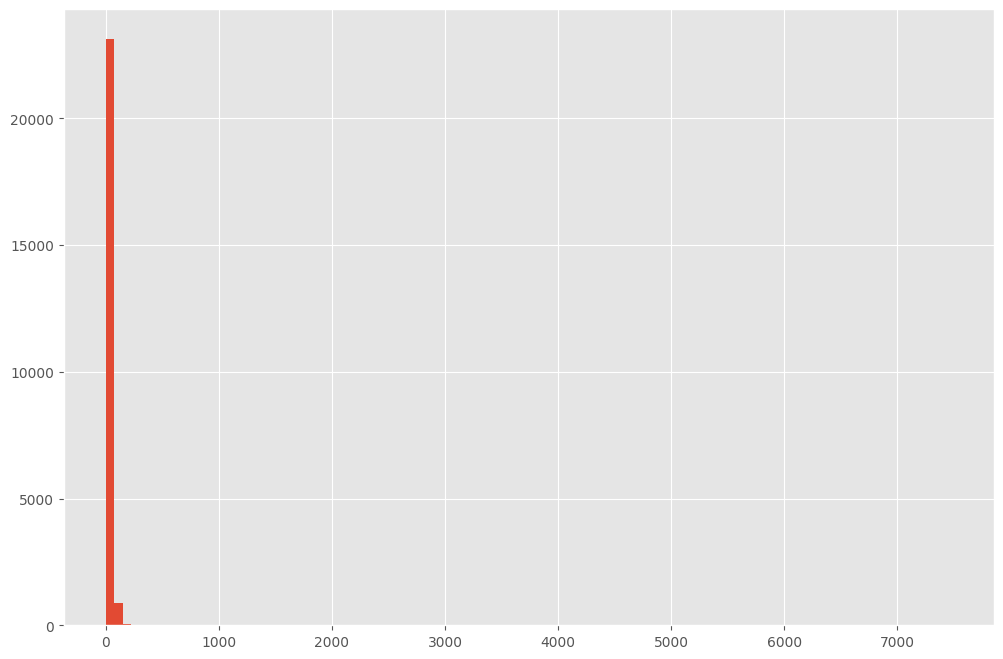

In [ ]:
df['life_sq'].hist(bins=100)

<Axes: >

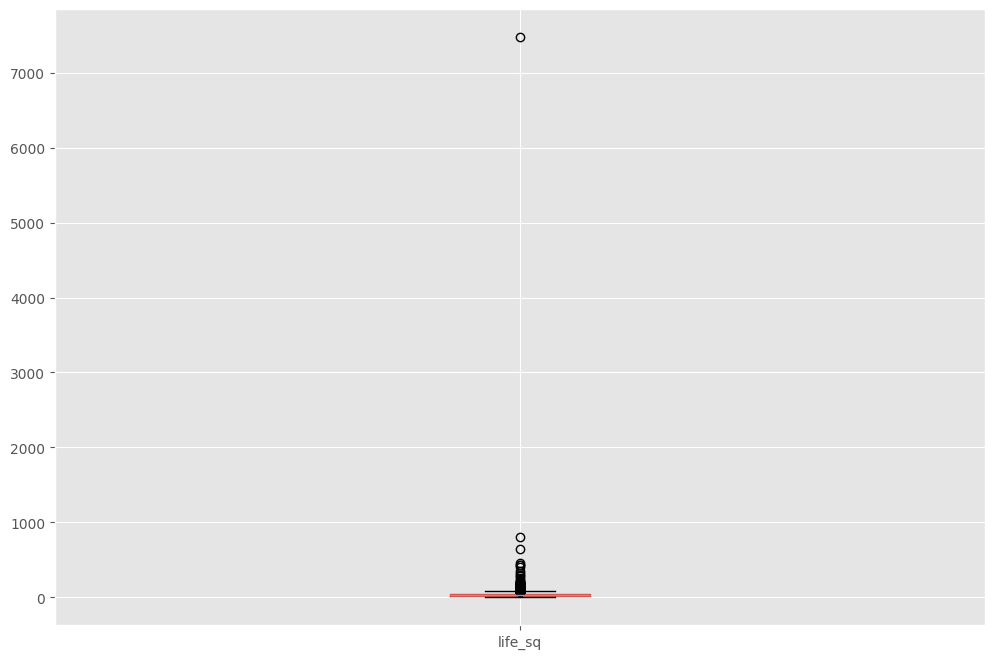

In [ ]:
df.boxplot(column=['life_sq'])

In [ ]:
df['life_sq'].describe()

count    24088.000000
mean        34.403271
std         52.285733
min          0.000000
25%         20.000000
50%         30.000000
75%         43.000000
max       7478.000000
Name: life_sq, dtype: float64

In [ ]:
df_deduplicated = df.drop('id', axis=1).drop_duplicates()

print(df_deduplicated.shape)
print(df_deduplicated)

(30461, 343)
        timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0      2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1      2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2      2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3      2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4      2011-09-05       77     77.0    4.0        NaN       NaN         NaN   
...           ...      ...      ...    ...        ...       ...         ...   
30466  2015-06-30       44     27.0    7.0        9.0       1.0      1975.0   
30467  2015-06-30       86     59.0    3.0        9.0       2.0      1935.0   
30468  2015-06-30       45      NaN   10.0       20.0       1.0         NaN   
30469  2015-06-30       64     32.0    5.0       15.0       1.0      2003.0   
30470  2015-06-30       43     28.0    1.0        9.0       1.0      1968.0   

       num_room  kitch_sq  state  ... 

In [ ]:
key = ['timestamp', 'full_sq', 'life_sq', 'floor', 'build_year', 'num_room', 'price_doc']
df.fillna(-1).groupby(key)['id'].count().sort_values(ascending=False).head(20)

timestamp   full_sq  life_sq  floor  build_year  num_room  price_doc
2014-04-15  134       134.0   1.0     0.0         3.0      5798496      2
2015-03-30  41        41.0    11.0    2016.0      1.0      4114580      2
2015-03-14  62       -1.0     2.0    -1.0         2.0      6520500      2
2012-09-05  43       -1.0     21.0   -1.0        -1.0      6229540      2
2014-12-09  40       -1.0     17.0   -1.0         1.0      4607265      2
2013-06-24  40       -1.0     12.0   -1.0        -1.0      4112800      2
2013-08-30  40       -1.0     12.0   -1.0         1.0      4462000      2
2013-09-23  85       -1.0     14.0   -1.0         3.0      7725974      2
2012-08-27  59       -1.0     6.0    -1.0        -1.0      4506800      2
2014-01-22  46        28.0    1.0     1968.0      2.0      3000000      2
2012-10-22  61       -1.0     18.0   -1.0        -1.0      8248500      2
2013-04-03  42       -1.0     2.0    -1.0        -1.0      3444000      2
2014-12-17  62       -1.0     9.0    -1.0  

In [ ]:
df_deduplicated2 = df.drop_duplicates(subset=key)
print(df.shape)
print(df_deduplicated2.shape)

(30471, 344)
(30455, 344)
